In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_pickle("result.pickle")

In [3]:
# Initialize empty dataframes
waiting_time_df = pd.DataFrame()
execution_time_df = pd.DataFrame()
num_car_on_map_df = pd.DataFrame()

# For 'fixed'
waiting_time_df['fixed'] = [data['fixed']['total_waiting_time']]

# For 'gurobi'
gurobi_waiting_times = []
gurobi_execution_times = pd.DataFrame()
gurobi_num_car_on_map = pd.DataFrame()

for iteration in data['gurobi'].keys():
    gurobi_waiting_times.append(data['gurobi'][iteration]['total_waiting_time'])
    gurobi_execution_times[iteration] = pd.Series(data['gurobi'][iteration]['execution_time_log'])
    gurobi_num_car_on_map[iteration] = pd.Series(data['gurobi'][iteration]['num_car_on_map_log'])

# For 'sa'
sa_waiting_times = []
sa_execution_times = pd.DataFrame()
sa_num_car_on_map = pd.DataFrame()

for iteration in data['sa'].keys():
    sa_waiting_times.append(data['sa'][iteration]['total_waiting_time'])
    sa_execution_times[iteration] = pd.Series(data['sa'][iteration]['execution_time_log'])
    sa_num_car_on_map[iteration] = pd.Series(data['sa'][iteration]['num_car_on_map_log'])

# For 'qa'
qa_waiting_times = []
qa_execution_times = pd.DataFrame()
qa_num_car_on_map = pd.DataFrame()

for iteration in data['qa'].keys():
    qa_waiting_times.append(data['qa'][iteration]['total_waiting_time'])
    qa_execution_times[iteration] = pd.Series(data['qa'][iteration]['execution_time_log'])
    qa_num_car_on_map[iteration] = pd.Series(data['qa'][iteration]['num_car_on_map_log'])


<h3>停止時間

In [4]:
# Calculate mean and standard deviation for 'sa' waiting times
waiting_time_df['sa_mean'] = [pd.Series(sa_waiting_times).mean()]
waiting_time_df['sa_std'] = [pd.Series(sa_waiting_times).std()]

# Calculate mean and standard deviation for 'qa' waiting times
waiting_time_df['qa_mean'] = [pd.Series(qa_waiting_times).mean()]
waiting_time_df['qa_std'] = [pd.Series(qa_waiting_times).std()]

# Calculate mean and standard deviation for 'gurobi' waiting times
waiting_time_df['gurobi_mean'] = [pd.Series(gurobi_waiting_times).mean()]
waiting_time_df['gurobi_std'] = [pd.Series(gurobi_waiting_times).std()]

# Assuming waiting_time_df is already defined and has the same structure as before
waiting_time_df_hour = waiting_time_df.copy()
waiting_time_df_hour[['gurobi_mean', 'gurobi_std', 'sa_mean', 'sa_std', 'qa_mean', 'qa_std','fixed']] /= 3600  # convert from seconds to hours

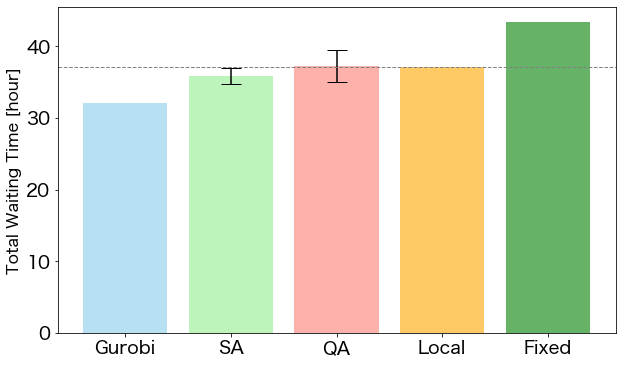

In [5]:
# Change font size
plt.rcParams.update({'font.size': 18})

# Define colors for the bar plot
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'green']


# Plot total_waiting_time
plt.figure(figsize=(10, 6))
methods = ['gurobi', 'sa', 'qa', 'local', 'fixed']

for i, method in enumerate(methods):
    if method == 'gurobi':
        method='Gurobi'
        # plt.bar(method, waiting_time_df_hour['gurobi_mean'], yerr=waiting_time_df_hour['gurobi_std'], capsize=10, color=colors[i], alpha=0.6)
        plt.bar(method, waiting_time_df_hour['gurobi_mean'], color=colors[i], alpha=0.6)
    elif method == 'sa':
        method='SA'
        plt.bar(method, waiting_time_df_hour['sa_mean'], yerr=waiting_time_df_hour['sa_std'], capsize=10, color=colors[i], alpha=0.6)
    elif method == 'qa':
        method='QA'
        plt.bar(method, waiting_time_df_hour['qa_mean'], yerr=waiting_time_df_hour['qa_std'], capsize=10, color=colors[i], alpha=0.6)
    elif method == 'local':
        method='Local'
        plt.bar(method, data['local']['total_waiting_time']/3600, color=colors[i], alpha=0.6)
    else:
        plt.bar('Fixed', waiting_time_df_hour.loc[0, method], color=colors[i], alpha=0.6)

plt.axhline(data['local']['total_waiting_time'] / 3600, color='gray', linestyle='--', linewidth=1)  # Add dotted horizontal line at 'local' value
plt.ylabel('Total Waiting Time [hour]', fontsize=16)
plt.savefig('waiting_time.pdf', format='pdf')
plt.show()
plt.close()  # Close the plot to prevent it from being displayed again


<h3>計算時間

In [6]:
# Transpose execution_time_df for plotting
execution_time_df = execution_time_df.transpose()

gurobi_execution_mean = gurobi_execution_times.mean(axis=1)
gurobi_execution_std = gurobi_execution_times.std(axis=1)

sa_execution_mean = sa_execution_times.mean(axis=1)
sa_execution_std = sa_execution_times.std(axis=1)

qa_execution_mean = qa_execution_times.mean(axis=1)
qa_execution_std = qa_execution_times.std(axis=1)

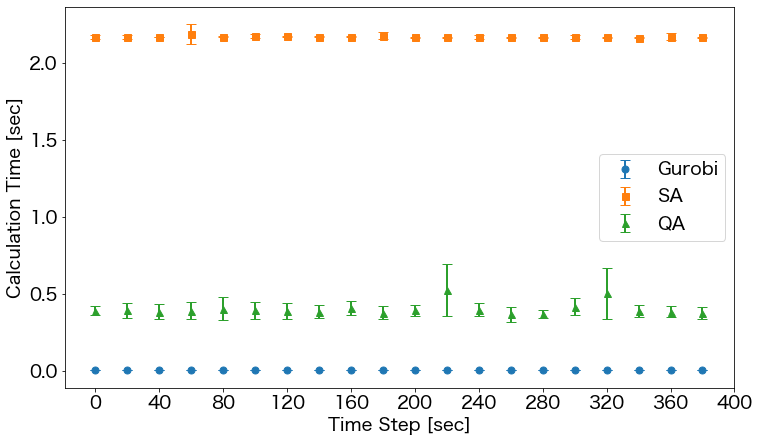

In [7]:
plt.rcParams.update({'font.size': 18})

# Plot execution_time_log
plt.figure(figsize=(12, 7))

# plot gurobi and sa data
plt.errorbar(gurobi_execution_mean.index, gurobi_execution_mean, yerr=gurobi_execution_std, label='Gurobi', linewidth=2.0, marker='o', linestyle='', markersize=7, capsize=5)
plt.errorbar(sa_execution_mean.index, sa_execution_mean, yerr=sa_execution_std, label='SA', linewidth=2.0, marker='s', linestyle='', markersize=7, capsize=5)
plt.errorbar(qa_execution_mean.index, qa_execution_mean, yerr=qa_execution_std, label='QA', linewidth=2.0, marker='^', linestyle='', markersize=7, capsize=5)

# set the x-ticks to match the data points
all_ticks = list(set(execution_time_df.columns).union(set(sa_execution_mean.index)))
plt.xticks(ticks=all_ticks, labels=all_ticks)

# set the x-ticks with a step size of 40
min_tick = min(all_ticks)
max_tick = max(all_ticks)
step_size = 40
ticks_40_step = np.arange(min_tick, max_tick + step_size, step_size)

plt.xticks(ticks=ticks_40_step, labels=ticks_40_step)

plt.xlabel('Time Step [sec]')
plt.ylabel('Calculation Time [sec]')
plt.legend()
plt.savefig('calc_time.pdf', format='pdf')
plt.show()
plt.close()  # Close the plot to prevent it from being displayed again


<h3>車の数

In [8]:
fixed_num_car_on_map = pd.Series(data['fixed']['num_car_on_map_log'])

gurobi_num_car_on_map_mean = gurobi_num_car_on_map.mean(axis=1)
gurobi_num_car_on_map_std = gurobi_num_car_on_map.std(axis=1)

sa_num_car_on_map_mean = sa_num_car_on_map.mean(axis=1)
sa_num_car_on_map_std = sa_num_car_on_map.std(axis=1)

qa_num_car_on_map_mean = qa_num_car_on_map.mean(axis=1)
qa_num_car_on_map_std = qa_num_car_on_map.std(axis=1)

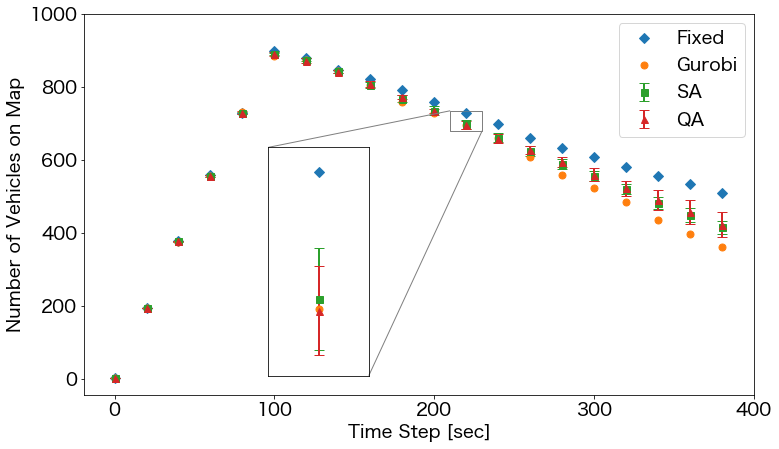

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

plt.rcParams.update({'font.size': 18})

# 定義: ポイント間隔
point_interval = 20

# Main figure
fig, main_ax = plt.subplots(figsize=(12, 7))

# Plot data on the main axes
main_ax.plot(fixed_num_car_on_map.index[::point_interval], fixed_num_car_on_map[::point_interval], label='Fixed', linestyle='', linewidth=2.0, marker="D", markersize=7)
# main_ax.plot(gurobi_num_car_on_map_mean.index[::point_interval], gurobi_num_car_on_map_mean.index[::point_interval], label='Gurobi', linestyle='', linewidth=2.0, marker="o", markersize=7)
main_ax.errorbar(gurobi_num_car_on_map_mean.index[::point_interval], gurobi_num_car_on_map_mean.iloc[::point_interval], label='Gurobi', linewidth=2.0, linestyle='', marker='o', markersize=7, capsize=5)
# main_ax.errorbar(gurobi_num_car_on_map_mean.index[::point_interval], gurobi_num_car_on_map_mean.iloc[::point_interval], yerr=gurobi_num_car_on_map_std.iloc[::point_interval], label='Gurobi', linewidth=2.0, linestyle='', marker='o', markersize=7, capsize=5)
main_ax.errorbar(sa_num_car_on_map_mean.index[::point_interval], sa_num_car_on_map_mean.iloc[::point_interval], yerr=sa_num_car_on_map_std.iloc[::point_interval], label='SA', linewidth=2.0, linestyle='', marker='s', markersize=7, capsize=5)
main_ax.errorbar(qa_num_car_on_map_mean.index[::point_interval], qa_num_car_on_map_mean.iloc[::point_interval], yerr=qa_num_car_on_map_std.iloc[::point_interval], label='QA', linewidth=2.0, linestyle='', marker='^', markersize=7, capsize=5)

# Set x-ticks and y-ticks for main axes
xticks = np.arange(0, 401, 100)
main_ax.set_xticks(xticks)

yticks = np.arange(0, 1001, 200)
main_ax.set_yticks(yticks)

main_ax.set_xlabel('Time Step [sec]')
main_ax.set_ylabel('Number of Vehicles on Map')
main_ax.legend()

# Create an inset axes with loc set to 'center'
axins = inset_axes(main_ax, width='150%', height='300%', loc='center', bbox_to_anchor=(0.3, 0.25, 0.1, 0.2), bbox_transform=main_ax.transAxes)


# Plot the same data on the inset
axins.plot(fixed_num_car_on_map.index[::point_interval], fixed_num_car_on_map[::point_interval], linestyle='', linewidth=2.0, marker="D", markersize=7)
# axins.plot(gurobi_num_car_on_map_mean.index[::point_interval], gurobi_num_car_on_map_mean.index[::point_interval], linestyle='', linewidth=2.0, marker="o", markersize=7)
# axins.errorbar(gurobi_num_car_on_map_mean.index[::point_interval], gurobi_num_car_on_map_mean.iloc[::point_interval], yerr=gurobi_num_car_on_map_std.iloc[::point_interval], linewidth=2.0, linestyle='', marker='o', markersize=7, capsize=5)
axins.errorbar(gurobi_num_car_on_map_mean.index[::point_interval], gurobi_num_car_on_map_mean.iloc[::point_interval], linewidth=2.0, linestyle='', marker='o', markersize=7, capsize=5)
axins.errorbar(sa_num_car_on_map_mean.index[::point_interval], sa_num_car_on_map_mean.iloc[::point_interval], yerr=sa_num_car_on_map_std.iloc[::point_interval], linewidth=2.0, linestyle='', marker='s', markersize=7, capsize=5)
axins.errorbar(qa_num_car_on_map_mean.index[::point_interval], qa_num_car_on_map_mean.iloc[::point_interval], yerr=qa_num_car_on_map_std.iloc[::point_interval], linewidth=2.0, linestyle='', marker='^', markersize=7, capsize=5)

# Define the range for the inset axes
x1, x2 = 210, 230  # x-range
y1, y2 = 680, 735  # y-range
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks(np.arange(200, x2, 100))
axins.set_yticks(np.arange(900, y2, 100))

# Add the inset indicator lines
main_ax.indicate_inset_zoom(axins)
mark_inset(main_ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")  # loc1, loc2はコネクタの位置を指定するためのパラメータ


plt.savefig('num_cars.pdf', format='pdf')
plt.show()
plt.close()


In [10]:
# 最適なパラメータの取得
import pickle

# データを開く
with open("best_params.pickle", "rb") as f:
    best_params = pickle.load(f)

In [11]:
def extract_params(best_params):
    R_params = {eval(k[2:]): v for k, v in best_params.items() if k.startswith('R_')}
    beta = best_params.get('beta', None)
    return R_params, beta

R_params, beta = extract_params(best_params)

<h3>パラメータ

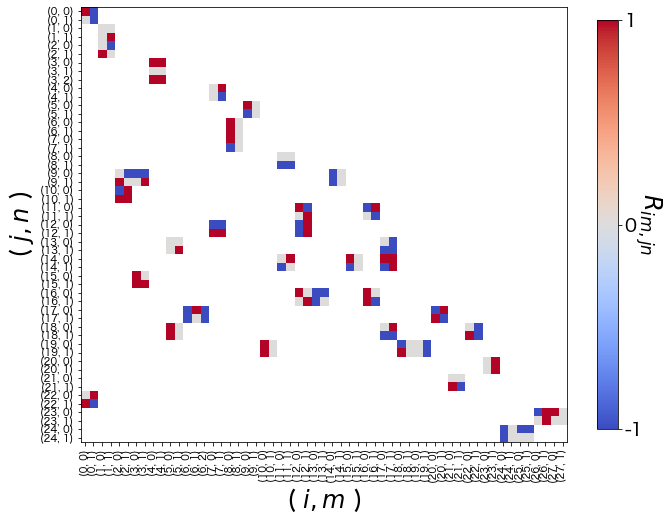

In [12]:
# 与えられたデータ
data = R_params.copy()

# x1とy1のユニークな値を取得
unique_x1_values = sorted(list(set(k[0] for k in data.keys())))
unique_y1_values = sorted(list(set(k[2] for k in data.keys())))

# ラベル変換のマッピングを作成
x1_label_mapping = {value: i for i, value in enumerate(unique_x1_values)}
y1_label_mapping = {value: i for i, value in enumerate(unique_y1_values)}

# x軸とy軸の座標を抽出し、変換されたラベルを使用
x_coords = [(x1_label_mapping[k[0]], k[1]) for k in data.keys()]
y_coords = [(y1_label_mapping[k[2]], k[3]) for k in data.keys()]

# ユニークなx座標とy座標を取得
unique_x_coords = sorted(list(set(x_coords)))
unique_y_coords = sorted(list(set(y_coords)))

num_x = len(unique_x_coords)
num_y = len(unique_y_coords)

# 値が存在しない場合のデフォルト値をNaNに設定
matrix = np.full((num_y, num_x), np.nan)

for (x1, x2, y1, y2), value in data.items():
    x_index = unique_x_coords.index((x1_label_mapping[x1], x2))
    y_index = unique_y_coords.index((y1_label_mapping[y1], y2))
    matrix[y_index, x_index] = value

plt.figure(figsize=(10, 10))
img = plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
cbar = plt.colorbar(img, shrink=0.6)  # shrinkパラメータでカラーバーのサイズを調整

# カラーバーのティックを1, 0, -1に設定
cbar.set_ticks([1, 0, -1])
cbar.set_ticklabels(['1', '0', '-1'])
cbar.set_label('$R_{im, jn}$', rotation=270, labelpad=20, fontsize=24)  # タイトルを追加

# タイトルとサブタイトルを設定
# plt.title('Optimized parameters', fontsize=16, fontweight='bold')


# fontsizeを追加してフォントサイズを調整
plt.xticks(np.arange(num_x), unique_x_coords, rotation=90, fontsize=10)
plt.yticks(np.arange(num_y), unique_y_coords, fontsize=10)

# 軸のラベルを設定
plt.xlabel('( $i, m$ )', fontsize=24)
plt.ylabel('( $j , n$ )', fontsize=24)

plt.tight_layout()
plt.savefig('optimized_R.pdf', format='pdf')
plt.show()
plt.close()  # Close the plot to prevent it from being displayed again
